![ADSA Logo](http://i.imgur.com/BV0CdHZ.png?2 "ADSA Logo")

# ADSA Workshop 4 - Introduction to Pandas and Matplotlib
Workshop content adapted from:
* [Data Science from Scratch - First Principles with Python](http://www.amazon.com/Data-Science-Scratch-Principles-Python/dp/149190142X)
* [Greg Reda's Intro to pandas data structures](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/)
* [Dr. Robert Brunner INFO 490](https://github.com/UI-DataScience/info490-fa16)


This workshop will dive into data processing and visualization with Numpy, Pandas, and Matplotlib.

***

# Pandas

As stated on the official [pandas site](http://pandas.pydata.org/) "pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language." Pandas is built on top of NumPy, and provides two key data structures for processing data: Series and DataFrames.

To begin, we first need to import pandas and numpy:

In [1]:
import pandas as pd
import numpy as np

'''
For easiest visual display later on.
'''
pd.set_option('max_columns', 50)

'''
This line is Jupyter Notebook specific and allows for graphs
to be displayed in the notebook.
''' 
%matplotlib inline

## Series

A Series is a one-dimensional object containing a series of items, and is similar to an array or list in Python. A Numpy series assigns a labeled index to every entry in the series, and uses the numbers 0 through n (length of the series - 1) by default.

### Creating a Series

To make a series, we can pass in a Python list to the pd.Series() function. Note the convenient printing format and indices given when we print the series.

In [7]:
s = pd.Series(['ADSA', 5, True, -3.14 ])
print s

0    ADSA
1       5
2    True
3   -3.14
dtype: object


If you want, you can specify index labels to be used rather than the default 0 to n, by passing in an index list. (Note that the index list must be the same length as the series).

A    ADSA
B       5
C    True
D   -3.76
dtype: object


Now, let's say you have to create a series that has your day's agenda on it. Today, you will hang out with friends, do homework, play xbox, and study for your midterm. Since this is an agenda, you want to label the indexes as 1,2,3,4 so that they can be listed in order. How would you do this?

We can also take an existing Python dictionary and convert it to a series by passing it into the pd.Series() function.

In [9]:
# Let's assume we have a dictionary of cities and weather data
d = {'Chicago': 75,
     'Boston': 65,
     'New York': 70,
     'San Francisco': 80,
     'Los Angeles': 82,
     'Austin': None
}



Austin            NaN
Boston           65.0
Chicago          75.0
Los Angeles      82.0
New York         70.0
San Francisco    80.0
dtype: float64


### Querying a Series

We can then access data for specific indices by passing either a single index, or a list of indices in brackets.

In [10]:
print weather['Chicago']

print '\n'

print weather[['Chicago', 'Austin']]

75.0


Chicago    75.0
Austin      NaN
dtype: float64


We can use boolean statements involving our series in order to check if something is in a series or generate a series of true and false values for those entries which satisfy the statement.

In [11]:
print 'Chicago' in weather

print '\n'

weather_less_than_80 = weather < 80
print weather_less_than_80

True


Austin           False
Boston            True
Chicago           True
Los Angeles      False
New York          True
San Francisco    False
dtype: bool


By passing in these boolean statements, we can query the series for entries which satisfy the boolean.

In [12]:
print weather[weather < 80]

print '\n'

Boston      65.0
Chicago     75.0
New York    70.0
dtype: float64


Boston      65.0
New York    70.0
dtype: float64


Series([], dtype: float64)




Suppose we had a series which contained the various incomes of Apple Employees

In [13]:
q = {'Employee 1': 100000,
     'Employee 2': 95000,
     'Employee 3': 140000,
     'Employee 4': 80000,
     'Employee 5': 90000,
     'Employee 6': 250000
}
income = pd.Series(q)
print income

Employee 1    100000
Employee 2     95000
Employee 3    140000
Employee 4     80000
Employee 5     90000
Employee 6    250000
dtype: int64


If Apple decides to raise the income of everyone who is making less than $100,000, how will they identify these people? 

### Combining Series

We can also perform scalar multiplication and division, and numpy operations on series.

In [14]:
print weather / 3

print '\n'

print weather * 2

print '\n'

print np.square(weather)

Austin                 NaN
Boston           21.666667
Chicago          25.000000
Los Angeles      27.333333
New York         23.333333
San Francisco    26.666667
dtype: float64


Austin             NaN
Boston           130.0
Chicago          150.0
Los Angeles      164.0
New York         140.0
San Francisco    160.0
dtype: float64


Austin              NaN
Boston           4225.0
Chicago          5625.0
Los Angeles      6724.0
New York         4900.0
San Francisco    6400.0
dtype: float64


So if we work with the same example with the income of the Apple employees, how will we increase just the salary of those making less than 100,000 by a multiple of 1.25 ?

Employee 2    118750.0
Employee 4    100000.0
Employee 5    112500.0
dtype: float64


We can also add two series together. If the same index exists in both series, then their values will be added, otherwise a Null/NaN (Not a Number) value will be assigned to the resulting series.

In [15]:
# Note that the two dictionaries share the key 'New York' but not Chicago or Boston
d1 = {'Chicago': 65, 
      'New York': 55
     }

d2 = {'New York': 10,
      'Boston': 60
     }

s1 = pd.Series(d1)
s2 = pd.Series(d2)

# The value for New York will be added, but the values for Chicago and Boston are indeterminate and marked as NaN


Boston       NaN
Chicago      NaN
New York    65.0
dtype: float64


Finally, to tell if values in a series or Null (NaN) or not, we can use the functions .isnull() and .notnull() respectively. Note that we can use the same boolean logic as before to either display True and False values for every index, or query for indices which are Null.

In [16]:
print s3.isnull()

print '\n'

print s3[s3.isnull()]

Boston       True
Chicago      True
New York    False
dtype: bool


Boston    NaN
Chicago   NaN
dtype: float64


## DataFrames

A DataFrame is a table-based Pandas data structure made up of rows and columns, just like a spreadsheet. Another way to think of DataFrames are as a group of Series in which each index is a column in the table.

### Creating a DataFrame from a Dictionary

In order to create a DataFrame from Python structures, we can create a dictionary of lists, in which each dictionary key is a column of the table, and each entry in the key's list is the value for that column in each row. 

We then call the pd.DataFrame(data, columns) function where data = the Python dictionary to be passed in, and columns = the ordering in which the columns appear in the table (If no order is specified, column names will be listed alphabetically).



In [17]:
d = {'student': ['Aaron', 'Josh', 'Tom', 'Justin', 'Andrew'],
     'credits': ['15', '14', '17', '18', '14'],
     'gpa': [3.52, 3.67, 3.43, 3.85, 3.32]
}



,student,credits,gpa
0,Aaron,15,3.52
1,Josh,14,3.67
2,Tom,17,3.43
3,Justin,18,3.85
4,Andrew,14,3.32


### Creating a DataFrame from a CSV

Often times, the dataset we have will be in CSV (Comma Separated Value) form. CSV files exist as a series of values separated by commas. For this tutorial, we have pulled a sample CSV file from the [Kaggle Titanic Project](https://www.kaggle.com/c/titanic/data?train.csv) containing data on the passengers of the Titanic.

To see what the Titanic data looks like as a CSV, click [here](https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv). 

We can easily take data from a CSV file and import it into a DataFrame by using the pd.read_csv() function. By passing in header=0, we tell Pandas that the header information is contained on row 0.

We can then read the first 5 entries by using the .head() function.

In [18]:
df = pd.read_csv('train.csv', header=0)

# Note that the csv data is now a Pandas DataFrame
print type(df)

# Returns first 5 entries


<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To view the last n entries, we can use the .tail(n) function.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Analyzing the Data

By calling the .info() function, we can see information regarding the column names, total number of entries, and types for each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From this data, we can see that we have 891 entries (rows) in our DataFrame. We can also infer that since Age, Cabin, and Embarked do not have 891 entries, there are some rows for which that information is Null.

### Summarizing the Data

The .describe() function can be incredibly useful when analzing a data set. By calling this function, Pandas will tell us the count, mean, standard deviation, interquartile range, maximum, and minumum values for each column in our data set which has a numerical type.

We must however, remember that there are Null values in the Age, Cabin, and Embarked columns, meaning you should take that into considering when discussing their described values.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Munging (Cleaning)

Pandas provides many tools to manipulate, filter, combine, and transform your data. We will now cover the syntax and some of the things you can do.

### Filtering Data

To grab the first 10 rows from the age column, we can enter the key and indices in square brackets [ ]. Alternatively, you can acess a column by typing its name right after the DataFrame name like df.Survived[0:10].

In [21]:
# Without indices, we can grab the entire column
# df.Age or df['Age']


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


If we look at the type of each column, we can see that DataFrames are actually made up of Pandas Series.

In [22]:
type(df.Age)

pandas.core.series.Series

By grabbing an individual column as a series, we can calculate the mean, median, or a number of statistical values by using methods of the same name.

MEAN: 29.6991176471
MEDIAN: 28.0
MAX: 80.0
MIN: 0.42
SUM: 21205.17


We can also grab a number of columns at once by passing in a list of columns.

In [22]:
df[['Sex', 'Pclass', 'Age']]

,Sex,Pclass,Age
0,male,3,22.0
1,female,1,38.0
2,female,3,26.0
3,female,1,35.0
4,male,3,35.0
5,male,3,NaN
6,male,1,54.0
7,male,3,2.0
8,female,3,27.0
9,female,2,14.0


### Example using survey data

Now, we are going to use an example with a survey. First, we need to load the csv 

In [23]:
st = pd.read_csv('Stat100_2013fall_survey01.csv', header=0)

# Returns first 10 entries


,gender,height,weight,shoeSize,shoeNums,schoolYear,pets,siblings,speed,cash,sleep,ageMother,ageFather,random,love,charity
0,female,72,174,11.0,17,Sophomore,4,5,80,3,7.0,42,36,6,one,25
1,female,67,140,8.5,100,Sophomore,0,1,110,76,8.5,55,61,6,dozens,90
2,female,64,107,6.0,25,Sophomore,5,2,100,75,7.5,58,60,4,few,75
3,male,70,185,11.0,7,Sophomore,3,2,95,35,7.0,53,55,8,few,60
4,female,62,133,7.0,8,Sophomore,30,1,195,18,6.0,41,49,6,hundreds,70
5,female,65,136,6.5,10,Freshman,2,2,80,20,7.0,51,49,3,one,100
6,male,67,162,10.0,20,Sophomore,0,2,115,50,5.0,38,45,10,few,70
7,male,71,165,10.5,11,Sophomore,0,1,120,10,7.0,53,56,5,few,50
8,male,72,135,10.5,5,Freshman,0,2,80,70,8.0,52,53,7,dozens,65
9,female,66,148,8.5,15,Junior,0,1,85,20,7.0,55,58,8,one,10


This DataFrame contains various information about different people. Suppose we wanted to find the mean and median of the number of shoes of the first 10 people. How would we do this?

First we would want to view ONLY the shoeNums column of the first 10 people. Write the code for that here 

1    100
2     25
3      7
4      8
5     10
6     20
7     11
8      5
9     15
Name: shoeNums, dtype: int64


Then, we would want to print the mean and median of this data. 

MEAN: 15.0342052314
MEDIAN: 12.0


### Querying DataFrames

Just as we discussed above in the Series section, we can pass in boolean arguments to query for data which satisfies a description.

For instance, let's say we want to look at every passenger of the Titanic who was over the age of 70, we could do this:

In [26]:
df[df.Age > 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


DataFrames allow us to run multiple queries on our data sets as well by either using parenthesis and an & sign, or by passing in two expressions in square brackets.

For example, we can pull all female passengers over the age of 60 by running this:

In [ ]:
df[(df.Sex == 'female') & (df.Age > 60)]
# or equivalently
# df[df.Sex == 'female'][df.Age > 60]

And we can further specify which additional column names we which to view by again passing a list of column names.

In [ ]:
df[(df.Sex == 'female') & (df.Age > 60)] [['Age','Sex','Ticket','Fare']]

If we were curious in investigating all the Null values for Age we discovered earlier, we can easily grab them. 

In [ ]:
df[df.Age.isnull()][['Age','Sex','Pclass']]

Going back to our example with the number of shoes, how would we identify all the female sophmores who sleep more than 9 hours a day?

***

# Data Visualization

"A fundamental part of the data scientist’s toolkit is data visualization. Although it is
very easy to create visualizations, it’s much harder to produce good ones.
There are two primary uses for data visualization:
* To explore data
* To communicate data"

-Joel Grus, Data Science from Scratch

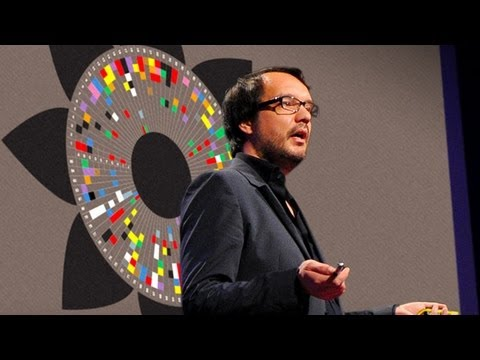

In [27]:
from IPython.display import YouTubeVideo
YouTubeVideo('5Zg-C8AAIGg', start=18) 

There are many tools that we can use to visualize data, however one of the most widely used tools is the [matplotlib](http://matplotlib.org/) library. While other libraries such as [d3.js](https://d3js.org/) are more commonly used for web visualizations, the matplotlib.pyplot module does an excellent job at quickly producing bar charts, line charts, and scatterplots in Python.

To begin, we will first import the pyplot module from matplotlib.

In [28]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


## Bar Charts

A bar chart can be a very helpful, simple visualization when you need to illustrate quantities of a discrete set of items. With matplotlib, we can take two lists, labels and heights, and easily create a bar chart.

We can use the plt.bar() method to create bargraphs. This function takes in a list of xcoordinates to start each bar, and a list of corresponding heights for each bar.

The following is an example of how we could create a simple bargraph to visualize the number of academy awards won by movies.

[0.1, 1.1, 2.1, 3.1, 4.1]


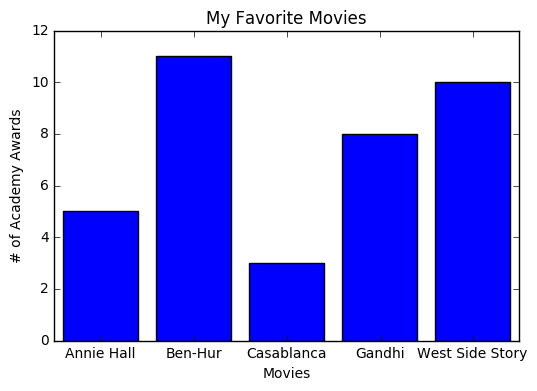

In [28]:
# These are movies we wish to plot, as well as the number of awards won
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

'''
Bars start from xcoordinate 0 by default, so to make the graph look nicer, we can add
0.1 to each bar xcoordinate to shift them a bit to the right.

One way to do this is to use a list comprehension along with a range from 0 to the length
of movies, and yield a list of each index + 0.1.
'''
xcoords = [i+0.1  for i in range(0, len(movies))]
print xcoords




Bargraphs are also great for creating histograms, graphs in which the y-axis illustrates frequency of the x-axis' values. 

Below is an example of how to create a histogram for exam distributions. In this example, we use a few other parameters in our plot. When we call plt.bar(), we pass in a bar width parameter, and we also call plt.axis() to change the range of x and y-coordinates shown.

[0, 100, 70, 80, 90, 60]
[2, 1, 3, 4, 2, 1]


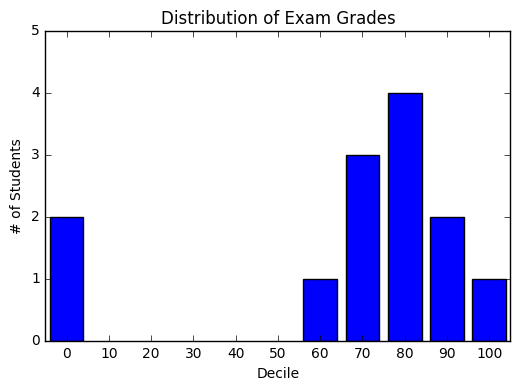

In [29]:
# Dictionary like structure which countains a count of the frequency of something
from collections import Counter

grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]

# The lambda keyword creates quick functions
# dec is a function which takes input grade and rounds it to the lowest nearest multiple of 10 
dec = lambda grade: (grade // 10) * 10

# This creates a dictionary of the frequency count of grades in each percentage range by 10's
histogram = Counter(dec(grade) for grade in grades)
print histogram.keys() # Retrieves all the keys
print histogram.values() # Retrieves frequencies

# We now create our graph. Note that we are scooting over the xcoords by 4 to make it look nice
plt.bar([x - 4 for x in histogram.keys()],
       histogram.values(),
       8) # We are passing in a value for the optional bar width parameter


### Line Charts

Line charts can be very useful in illustrating trends, and be very useful for visualizing data. We can use the plt.plot() method in order to create line charts with Matplotlib. 

Below is an example of a fake stock market chart comparing two companies:

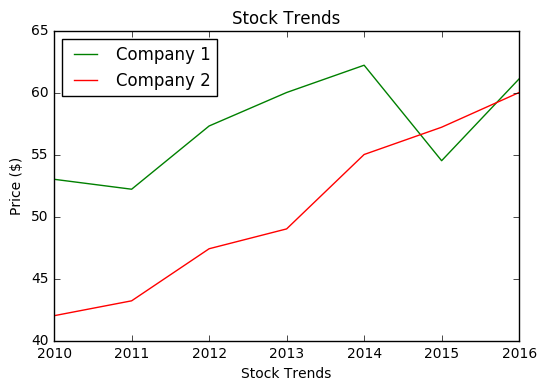

In [30]:
# Fake company stock data
company1 = [53.0, 52.2, 57.3, 60.0, 62.2, 54.5, 61.1]
company2 = [42.0, 43.2, 47.4, 49.0, 55.0, 57.2, 60.0]
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016]

# The xcoords are the same for both, so we can just grab them for company 1
xcoords = [i for i in range(0, len(company1))]



### Scatter Plots

Finally, scatter plots can be useful for illustrating the relationship between two variables. We can use the plt.scatter() function to create scatter plots in matplotlib.

Below is an example of a scatter plot showing the relatinoship between number of online friends vs the number of minutes spent on a social media website.

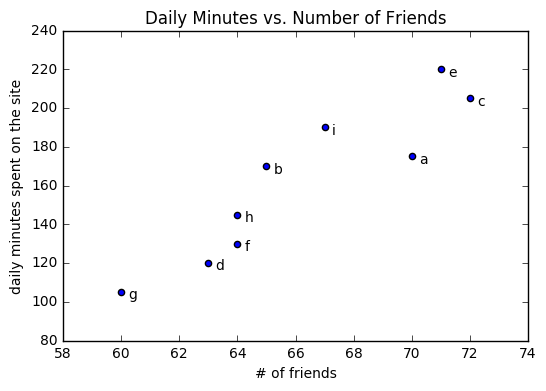

In [31]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'] # A list of arbitrary labels for the scatter points

# Creates scatter plot


# label each point. Zipping creates a list of tuples that looks like [('a', 70, 175), ('b', 65, 170)...] etc.
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
    xy=(friend_count, minute_count), # put the label with its point
    xytext=(5, -5), # offsets the label by +5x and -5y
    textcoords='offset points') # tells matplotlib that the xytext sh

    
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

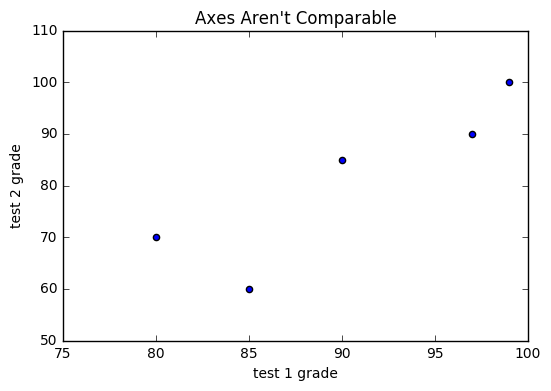

In [32]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

## Adding more control to our display

As of now, we have been using <i>implicit</i> figure and axis creation in our plots. This has sufficed for creating quick and easy graphs, but won't allow us to create richer visualizations. Let's see how handling Figures, subplots, and axis explicitly can give us more control over our plots.

We will take the previous Stock Trends data from before, and try to display them separately.

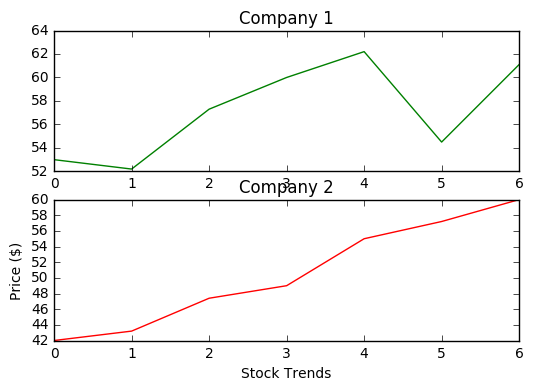

# Seaborn

While Matplotlib is an extremley powerful tool for visualizing datasets in Python, the API can be daunting for beginners. In addition, it takes a considerable amount of work to produce aesthetically pleasing visualizations. Many libraries have been created to help remedy this problem, but in this notebook we will get a taste of the most popular of them, Seaborn.

Below, we will take a visualization that we had made before, and see what the Seaborn library can do in improving our visualizations.


In [35]:
import seaborn as sns

[0.1, 1.1, 2.1, 3.1, 4.1]


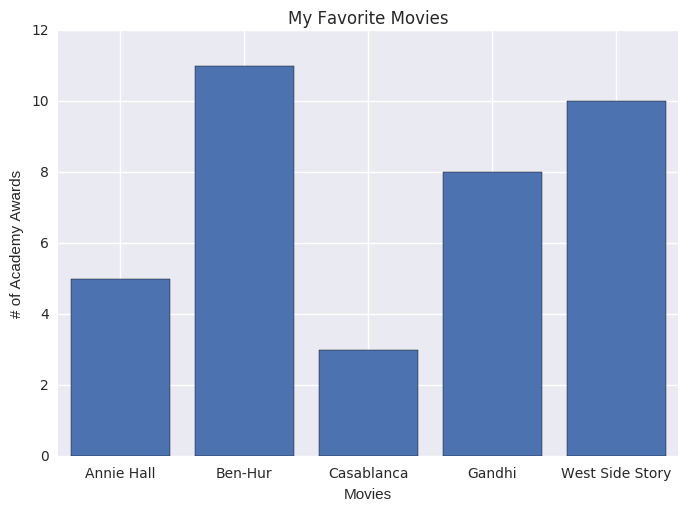

In [36]:
# These are movies we wish to plot, as well as the number of awards won
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

'''
Bars start from xcoordinate 0 by default, so to make the graph look nicer, we can add
0.1 to each bar xcoordinate to shift them a bit to the right.

One way to do this is to use a list comprehension along with a range from 0 to the length
of movies, and yield a list of each index + 0.1.
'''
xcoords = [i+0.1  for i in range(0, len(movies))]
print xcoords

# plot bars with left x-coordinates [xcoords], heights [num_oscars]
plt.bar(xcoords, num_oscars)

# We can add titles and x/y labels by using the following plt methods
plt.xlabel('Movies')
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

# To add a label for each bar, we can use .xticks with a list of xcoordinates and strings
# We move over the xcoordinates by 0.5 this time just to properly center them
plt.xticks([i + 0.5 for i in range(0, len(movies))], movies)

#Let's remove the top and right axis 
sns.despine()

#I'm showing you the graph in an talk, so let's set that context
sns.set_context("notebook")

plt.show()

# Putting it all together

We've seen that Seaborn(Matplotlib) and Pandas has given us an expansive toolbox in working with data. Let's try to apply what we have learned to a dataset regarding resturant tips.

In [37]:
#Let's load in the dataset 
tips_df = pd.read_csv("tips.csv")
#Remove the first column (Pandas already takes care of it!)
tips_df.drop('obs',1)

,totbill,tip,sex,smoker,day,time,size
0,16.99,1.01,F,No,Sun,Night,2
1,10.34,1.66,M,No,Sun,Night,3
2,21.01,3.50,M,No,Sun,Night,3
3,23.68,3.31,M,No,Sun,Night,2
4,24.59,3.61,F,No,Sun,Night,4
5,25.29,4.71,M,No,Sun,Night,4
6,8.77,2.00,M,No,Sun,Night,2
7,26.88,3.12,M,No,Sun,Night,4
8,15.04,1.96,M,No,Sun,Night,2
9,14.78,3.23,M,No,Sun,Night,2


Now that we have cleaned up our dataset, let's see if we can explore some trends. The nice thing about Seaborn and Pandas is that they work very well with each other.

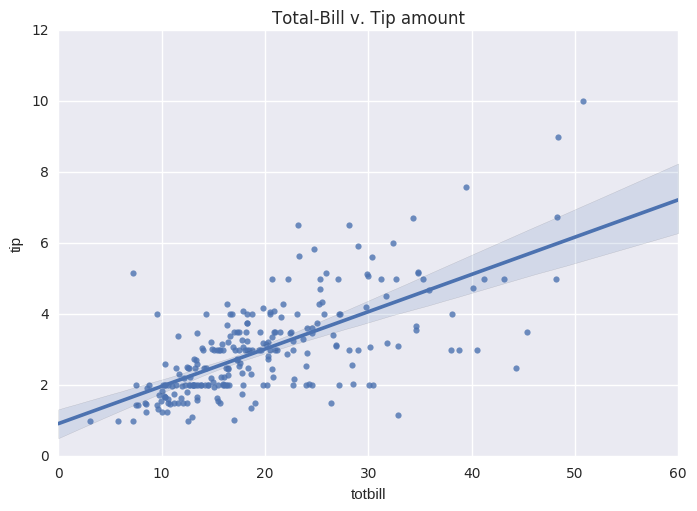

In [38]:
#Assigning variables for ease later.
totbill = tips_df['totbill']
tip = tips_df['tip']


#Use the built-in regplot function to generate a scatter plot w/lin regression.
ax_tip = sns.regplot(x=totbill, y=tip, data=tips_df)

#Set the title of the Graph.
ax_tip.set_title("Total-Bill v. Tip amount")

sns.set_context("talk")

#Display the result on the graph.
plt.show()


Now you try! See if you can plot a dataset relating the tipping behaviors of smokers and non-smokers.

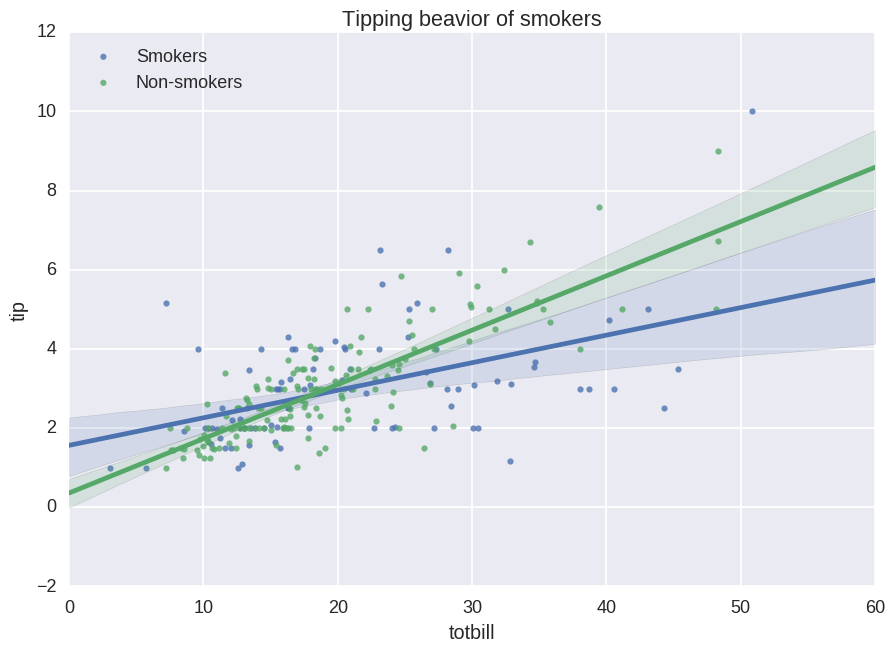